In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
boc = BrainObservatoryCache()

# Visual stimuli

As we saw in the [overview](vc2p-dataset.md), there were a range of visual stimuli presented to the mice in these experiments.

In [3]:
boc.get_all_stimuli()

['drifting_gratings',
 'locally_sparse_noise',
 'locally_sparse_noise_4deg',
 'locally_sparse_noise_8deg',
 'natural_movie_one',
 'natural_movie_three',
 'natural_movie_two',
 'natural_scenes',
 'spontaneous',
 'static_gratings']

Here we will look at each stimulus, and what information we have about its presentation.

## Drifting gratings
The drifting gratings stimulus consists of a sinusoidal grating that is presented on the monitor that moves orthogonal to the orientation of the grating, moving in one of 8 directions (called <b>orientation</b>) and at one of 5 <b>temporal frequencies</b>. The directions are specified in units of degrees and temporal frequency in Hz. The grating has a spatial frequency of 0.04 cycles per degree and a contrast of 80%.
Each trial is presented for 2 seconds with 1 second of mean luminance gray in between trials.

Let's find the session in the experiment container we're exploring that contains the drifting gratings stimulus.

In [4]:
experiment_container_id = 511510736
session_id = boc.get_ophys_experiments(experiment_container_ids=[experiment_container_id], stimuli=['drifting_gratings'])[0]['id']
data_set = boc.get_ophys_experiment_data(ophys_experiment_id=session_id)

Let's look at the stimulus table for the drifting gratings stimulus

In [5]:
drifting_gratings_table = data_set.get_stimulus_table('drifting_gratings')
drifting_gratings_table.head(n=10)

,temporal_frequency,orientation,blank_sweep,start,end
0,8.0,270.0,0.0,747,807
1,2.0,135.0,0.0,837,897
2,2.0,315.0,0.0,927,987
3,15.0,315.0,0.0,1018,1077
4,1.0,270.0,0.0,1108,1168
5,15.0,315.0,0.0,1198,1258
6,1.0,315.0,0.0,1289,1348
7,15.0,180.0,0.0,1379,1439
8,2.0,135.0,0.0,1469,1529
9,NaN,NaN,1.0,1560,1619


start
: The 2p imaging frame during which the trial starts. This indexes directly into the activity traces (e.g. dff or extracted events) and behavior traces (e.g. running speed).

end
: The 2p imaging frame during which the trial ends. This indexes directly into the activity traces (e.g. dff or extracted events) and behavior traces (e.g. running speed).

orientation
: The direction of the drifting grating trial in degrees. Value of NaN indicates a blanksweep.

temporal_frequency
: The temporal frequency of the drifting grating trial in Hz. This refers to how many complete periods the signal goes through for a given unit of time. Value of NaN indicates a blanksweep.

blank_sweep
: A boolean indicating whether the trial is a blank sweep during which no grating is presented and the monitor remains at mean luminance gray.

What are the orientation and temporal frequency values used in this stimulus?

In [6]:
orivals = drifting_gratings_table.orientation.dropna().unique()
print("orientations: ", np.sort(orivals))
tfvals = drifting_gratings_table.temporal_frequency.dropna().unique()
print("temporal frequencies: ", np.sort(tfvals))

orientations:  [  0.  45.  90. 135. 180. 225. 270. 315.]
temporal frequencies:  [ 1.  2.  4.  8. 15.]


How many blank sweep trials are there?

In [7]:
len(drifting_gratings_table[np.isnan(drifting_gratings_table.orientation)])

30

How many trials are there for any one stimulus condition?

In [8]:
ori=45
tf=2
len(drifting_gratings_table[(drifting_gratings_table.orientation==ori)&(drifting_gratings_table.temporal_frequency==2)])

15

What is the duration of a trial?

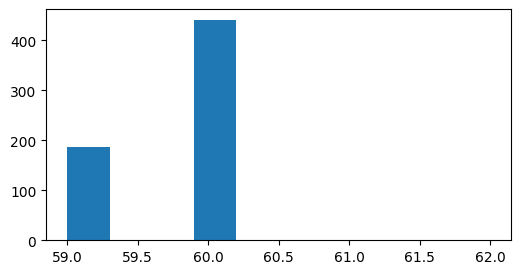

In [9]:
plt.figure(figsize=(6,3))
durations = drifting_gratings_table.end - drifting_gratings_table.start
plt.hist(durations);

Most trials have a duration of 60 imaging frames. As the two photon microscope we use has a frame rate of 30Hz this is 2 seconds. But you can see that there is some jitter across trials as to the precise duration.

What is the inter trial interval? Let's look at the first 100 trials:

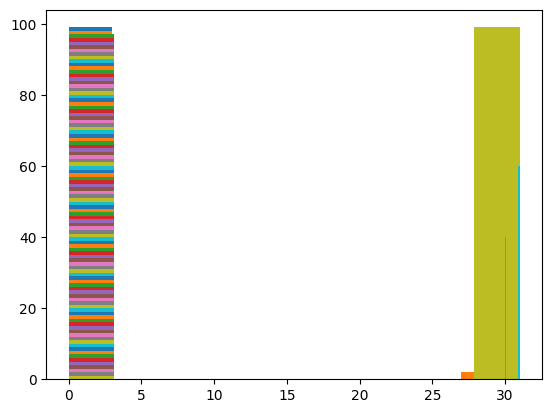

In [10]:
intervals = np.empty((100))
for i in range(100):
  intervals[i] = drifting_gratings_table.start[i+1] - drifting_gratings_table.end[i]
  plt.hist(intervals);

## Static gratings
The static gratings stimulus consists of a <b>stationary</b> sinusoidal grating that is flasshed on the monitor at one of 6 <b>orientations</b>, one of 5 <b>spatial frequencies</b>, and one of 4 <b>phases</b>. The grating has a contrast of 80%.
Each trial is presented for 0.25 seconds and followed immediately by the next trial without any intertrial interval. There are blanksweeps, where the grating is replaced by the mean luminance gray, interleaved among the trials.

Let's find the session in the experiment container we're exploring that contains the static gratings stimulus.

In [11]:
session_id = boc.get_ophys_experiments(experiment_container_ids=[experiment_container_id], stimuli=['static_gratings'])[0]['id']
data_set = boc.get_ophys_experiment_data(ophys_experiment_id=session_id)

Let's look at the stimulus table for the static gratings stimulus

In [12]:
static_gratings_table = data_set.get_stimulus_table('static_gratings')
static_gratings_table.head(n=10)

,orientation,spatial_frequency,phase,start,end
0,90.0,0.04,0.50,747,754
1,150.0,0.04,0.50,754,761
2,30.0,0.02,0.00,762,769
3,0.0,0.32,0.50,769,776
4,150.0,0.16,0.75,777,784
5,150.0,0.08,0.25,784,791
6,90.0,0.32,0.50,792,799
7,60.0,0.04,0.25,799,806
8,30.0,0.08,0.75,807,814
9,90.0,0.32,0.50,814,821


start
: The 2p imaging frame during which the trial starts. This indexes directly into the activity traces (e.g. dff or extracted events) and behavior traces (e.g. running speed).

end
: The 2p imaging frame during which the trial ends. This indexes directly into the activity traces (e.g. dff or extracted events) and behavior traces (e.g. running speed).

orientation
: The orientation of the grating trial in degrees. Value of NaN indicates a blanksweep.

spatial_frequency
: The spatial frequency of the grating trial in cycles per degree (cpd). This refers to how many complete periods the signal goes through for a given unit of distance. Value of NaN indicates a blanksweep.

phase
: The phase of the grating trial, indicating the position of the grating. Value of NaN indicates a blanksweep.

What are the orientation, spatial frequency, and phase values used in this stimulus?

In [13]:
print("orientations: ", np.sort(static_gratings_table.orientation.dropna().unique()))
print("spatial frequencies: ", np.sort(static_gratings_table.spatial_frequency.dropna().unique()))
print("phases: ", np.sort(static_gratings_table.phase.dropna().unique()))

orientations:  [  0.  30.  60.  90. 120. 150.]
spatial frequencies:  [0.02 0.04 0.08 0.16 0.32]
phases:  [0.   0.25 0.5  0.75]


How many blank sweep trials are there?

In [14]:
len(static_gratings_table[np.isnan(static_gratings_table.orientation)])

192

How many trials are there of any one stimulus codition?

In [15]:
ori=30
sf=0.04
phase=0.0
len(static_gratings_table[(static_gratings_table.orientation==ori)&(static_gratings_table.spatial_frequency==sf)&(static_gratings_table.phase==phase)])

49

```{note} 
There are roughly 50 trials fo each stimulus condition, but not precisely. Some conditions have fewer than 50 trials but none have more than 50 trials.
```

What is the duration of a trial?

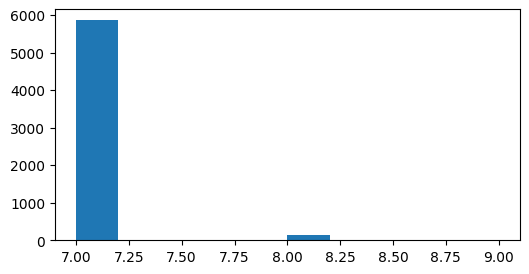

In [16]:
plt.figure(figsize=(6,3))
durations = static_gratings_table.end - static_gratings_table.start
plt.hist(durations);

What is the inter trial interval?

In [17]:
#intervals = np.empty((50))
#for i in range(50):
  #intervals[i] = static_gratings_table.start[i+1] - #static_gratings_table.end[i]
  #plt.hist(intervals);

## Natural scenes
The natural scenes stimulus consists of a 118 black and whiteimages that are flashed on the monitor. Each trial is presented for 0.25 seconds and followed immediately by the next trial without any intertrial interval. There are blanksweeps, where the images are replaced by the mean luminance gray, interleaved in among the trials.
The images are taken from three different image sets including CITATIONS HERE

Let's find the session in the experiment container we're exploring that contains the natural scenes stimulus.

In [18]:
session_id = boc.get_ophys_experiments(experiment_container_ids=[experiment_container_id], stimuli=['natural_scenes'])[0]['id']
data_set = boc.get_ophys_experiment_data(ophys_experiment_id=session_id)

Let's look at the stimulus table for the natural scenes stimulus

In [19]:
natural_scenes_table = data_set.get_stimulus_table('natural_scenes')
natural_scenes_table.head(n=10)

,frame,start,end
0,81,16100,16107
1,33,16108,16115
2,76,16115,16122
3,13,16123,16130
4,56,16130,16137
5,30,16138,16145
6,44,16145,16152
7,93,16153,16160
8,65,16160,16167
9,60,16168,16175


start
: The 2p imaging frame during which the trial starts. This indexes directly into the activity traces (e.g. dff or extracted events) and behavior traces (e.g. running speed).

end
: The 2p imaging frame during which the trial ends. This indexes directly into the activity traces (e.g. dff or extracted events) and behavior traces (e.g. running speed).

frame
: Which image was presented in the trial. This indexes into the [stimulus template](ns_stimulus_template).

```{note} 
The blanksweeps in the natural scene stimulus table are identified by having a frame value of <b>-1</b>
```

How many blank sweep trials are there?

In [20]:
len(natural_scenes_table[natural_scenes_table.frame==-1])

50

How many trials are there of any one image?

In [21]:
len(natural_scenes_table[natural_scenes_table.frame==22])

50

(ns_stimulus_template)=
### Stimulus template
The stimulus template is an array that contains the images that were presented to the mouse. This can be accessed using `get_stimulus_template()`.

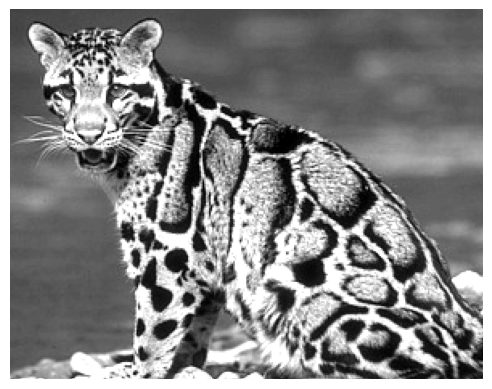

In [22]:
natural_scene_template = data_set.get_stimulus_template('natural_scenes')
scene_number=22
plt.imshow(natural_scene_template[scene_number,:,:], cmap='gray')
plt.axis('off');

(natural_movie)=
## Natural movies
There are three different natural movie stimuli:
- natural_movie_one
- natural_movie_two
- natural_movie_three

Natural movie one is presented in every session. It is 30 seconds long and is repeated 10 times in each session.
Natural movie two is presented in three_session_B. It is 30 seconds long and is repeated 10 times.
Natural movie three is presented in three_session_A. It is 2 minutes long and is presented a total of 10 times, but in two epochs.
All of these movies are from the opening scene of <b>Touch of Evil</b>, and Orson Welles film. This was selected because it is a continuous shot with no camera cuts and with a variety of different motion signals.

In [23]:
session_id = boc.get_ophys_experiments(experiment_container_ids=[experiment_container_id], stimuli=['natural_movie_one'])[0]['id']
data_set = boc.get_ophys_experiment_data(ophys_experiment_id=session_id)

Let's look at the stimulus table for the natural movie stimulus

In [24]:
natural_movie_table = data_set.get_stimulus_table('natural_movie_one')
natural_movie_table.head(n=10)

,frame,start,end,repeat
0,0,70307,70307,0
1,1,70308,70308,0
2,2,70309,70309,0
3,3,70310,70310,0
4,4,70311,70311,0
5,5,70312,70312,0
6,6,70313,70314,0
7,7,70314,70315,0
8,8,70315,70316,0
9,9,70316,70317,0


start
: The 2p imaging frame during which the trial starts. This indexes directly into the activity traces (e.g. dff or extracted events) and behavior traces (e.g. running speed).

end
: The 2p imaging frame during which the trial ends. This indexes directly into the activity traces (e.g. dff or extracted events) and behavior traces (e.g. running speed).

frame
: Which frame of the movie was presented in the trial. This indexes into the [stimulus template](nm_stimulus_template).

repeat
: The number of the repeat of the movie.

The movies are different from the previous stimuli where the different trials pertained to distinct images or stimulus conditions. Here each "trial" is a frame of the movie, and the trial duration closely matches the 2p imaging frames.
But the movie is repeated 10 times, and you might want to identify the start of each repeat.

In [25]:
natural_movie_table[natural_movie_table.frame==0] 

,frame,start,end,repeat
0,0,70307,70307,0
900,0,71210,71211,1
1800,0,72113,72114,2
2700,0,73016,73017,3
3600,0,73919,73920,4
4500,0,74822,74823,5
5400,0,75725,75726,6
6300,0,76629,76630,7
7200,0,77532,77533,8
8100,0,78435,78436,9


(nm_stimulus_template)=
### Stimulus template
The stimulus template is an array that contains the images of the natural movie stimulus that were presented to the mouse. This can be accessed using <b>get_stimulus_template</b>. Let's look at the first frame:

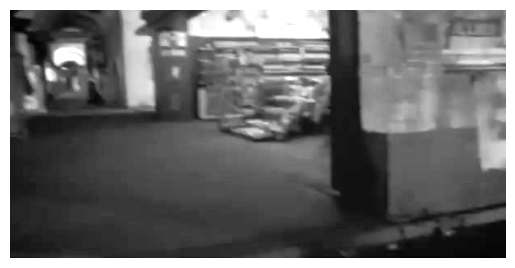

In [26]:
natural_movie_template = data_set.get_stimulus_template('natural_movie_one')
plt.imshow(natural_movie_template[0,:,:], cmap='gray')
plt.axis('off');

(locally_sparse_noise)=
## Locally sparse noise
The locally sparse noise stimulus is used to map the spatial receptive field of the neurons. There are three stimuli that are used. For the data published in June 2016 and October 2016, the <b>locally_sparse_noise</b> stimulus was used, and these were presented in the session called <b>three_session_C</b>. For the data published after that, both <b>locally_sparse_noise_4deg</b> and <b>locally_sparse_noise_8deg</b> were used and these were presented in <b>three_session_C2</b>.

The <b>locally_sparse_noise</b> and <b>locally_sparse_noise_4deg</b> stimulus consisted of a 16 x 28 array of pixels, each 4.65 degrees on a side. Please note, while this stimulus is called <b>locally_sparse_noise_4deg</b>, the pixel size is in fact 4.65 degrees. For each frame of the stimulus a small number of pixels were white and a small number were black, while the rest were mean luminance gray. In total there were ~11 white and black spots in each frame. The white and black spots were distributed such that no two spots were within 5 pixels of each other. Each time a given pixel was occupied by a black (or white) spot, there was a different array of other pixels occupied by either black or white spots. As a result, when all of the frames when that pixel was occupied by the black spot were averaged together, there was no significant structure surrounding the specified pixel. Further, the stimulus was well balanced with regards to the contrast of the pixels, such that while there was a slightly higher probability of a pixel being occupied just outside of the 5-pixel exclusion zone, the probability was equal for pixels of both contrast. Each pixel was occupied by either a white or black spot a variable number of times.
The only difference between <b>locally_sparse_noise</b> and <b>locally_sparse_noise_4deg</b> is that the latter is roughly half the trials as the former.

The <b>locally_sparse_noise_8deg</b> stimulus consists of an 8 x 14 array made simply by scaling the 16 x 28 array used for the 4 degree stimulus. Please note, while the name of the stimulus is <b>locally_sparse_noise_4deg</b>, the actual pixel size is 9.3 degrees. The exclusions zone of 5 pixels was 46.5 degrees. This larger pixel size was found to be more effective at eliciting responses in the {term}`HVA`s.

In [27]:
experiment_container_id = 511510736
session_id = boc.get_ophys_experiments(experiment_container_ids=[experiment_container_id], stimuli=['locally_sparse_noise'])[0]['id']
data_set = boc.get_ophys_experiment_data(ophys_experiment_id=session_id)

In [28]:
lsn_table = data_set.get_stimulus_table('locally_sparse_noise')
lsn_table.head(n=10)

,frame,start,end
0,0,746,753
1,1,753,760
2,2,761,768
3,3,768,776
4,4,776,783
5,5,784,791
6,6,791,798
7,7,799,806
8,8,806,813
9,9,814,821


start
: The 2p imaging frame during which the trial starts. This indexes directly into the activity traces (e.g. dff or extracted events) and behavior traces (e.g. running speed).

end
: The 2p imaging frame during which the trial ends. This indexes directly into the activity traces (e.g. dff or extracted events) and behavior traces (e.g. running speed).

frame
: Which frame of the locally sparse noise movie was presented in the trial. This indexes into the [stimulus template](lsn_stimulus_template).

What is the duration of a trial?

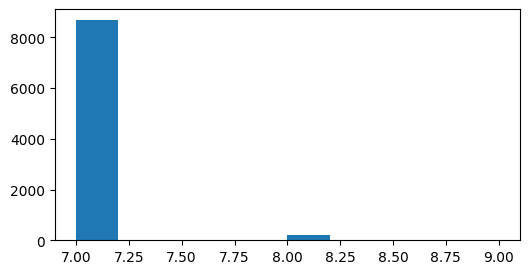

In [29]:
plt.figure(figsize=(6,3))
durations = lsn_table.end - lsn_table.start
plt.hist(durations);

The locally sparse noise stimuli have the same temporal structure as the natural scenes and static gratings. Each image is presented for 0.25s (~7 frames) and is followed immediately by the next image.

(lsn_stimulus_template)=
### Stimulus template
The stimulus template is an array that contains the images of the locally sparse noice stimulus that were presented to the mouse. This can be accessed using `get_stimulus_template()`. Let's look at the first frame:

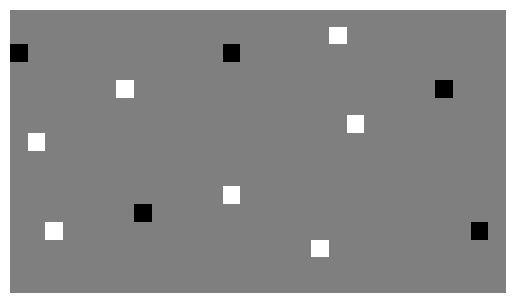

In [30]:
lsn_template = data_set.get_stimulus_template('locally_sparse_noise')
plt.imshow(lsn_template[0,:,:], cmap='gray')
plt.axis('off');

(spontaneous_activity)=
## Spontaneous activity
In each session there is at least one five-minute epoch of spontaneous activity. During this epoch the monitor is held at mean luminance gray and there is no patterned stimulus presented. This provides a valuable time that can be used as a baseline comparison for visually evoked activity.

In [31]:
spont_table = data_set.get_stimulus_table('spontaneous')
spont_table

,start,end
0,22575,31456
1,73155,82035


start
: The 2p imaging frame during which the spontaneous activity starts. This indexes directly into the activity traces (e.g. dff or extracted events) and behavior traces (e.g. running speed).

end
: The 2p imaging frame during which the spontaneous activity ends. This indexes directly into the activity traces (e.g. dff or extracted events) and behavior traces (e.g. running speed).

This is a session that has two epochs of spontaneous activity. What is their duration?

In [32]:
durations = spont_table.end - spont_table.start
durations

0    8881
1    8880
dtype: int64